# Comparison

This notebook is used to generate tables and figures for the Evaluation / Discussion sections of the paper.

In [1]:
%cd ..

/Users/maxschmaltz/Desktop/DEKOR


/Users/maxschmaltz/Desktop/DEKOR/.venv/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
paths = {

	"ngrams": "benchmarking/results/ngrams/final/",
	"ffn": "benchmarking/results/nns/ffn/final/",
	"rnn": "benchmarking/results/nns/rnn/final/",
	"gru": "benchmarking/results/nns/gru/final/",
	"cnn": "benchmarking/results/nns/cnn/final/",
	"gbert": "benchmarking/results/llms/gbert/final/",
	"byt5": "benchmarking/results/llms/byt5/final/",
	"llama-instruct-base": "benchmarking/results/llms/llama-instruct/languages",
	"llama-instruct+comp": "benchmarking/results/llms/llama-instruct/plus_candidates",
	"llama-instruct+comp+par": "benchmarking/results/llms/llama-instruct/full"
}

## Average Metrics

In [3]:
import os
import pandas as pd

In [4]:
link_metrics_data_avg = {
	key: pd.read_csv(
		os.path.join(path, "link_metrics.tsv"),
		sep="\t",
		index_col=0,
		names=[key]
	).T.to_dict(orient="records")[0]
	for key, path in paths.items()
}

link_metrics_avg = pd.DataFrame(link_metrics_data_avg).T
link_metrics_avg

,precision,recall,f1,accuracy
ngrams,0.672649,0.346651,0.431644,0.777592
ffn,0.038295,0.055252,0.043506,0.454849
rnn,0.058927,0.092594,0.056399,0.245819
gru,0.066913,0.153037,0.061108,0.150502
cnn,0.040794,0.145303,0.048086,0.356187
gbert,0.146487,0.126674,0.134475,0.585284
byt5,0.578567,0.359237,0.432265,0.735786
llama-instruct-base,0.590623,0.370475,0.421980,0.716279
llama-instruct+comp,0.572266,0.330378,0.396095,0.859532
llama-instruct+comp+par,0.540955,0.311537,0.372696,0.842809


In [5]:
type_metrics_data_avg = {
	key: pd.read_csv(
		os.path.join(path, "type_metrics.tsv"),
		sep="\t",
		index_col=0,
		names=[key]
	).T.to_dict(orient="records")[0]
	for key, path in paths.items()
}

type_metrics_avg = pd.DataFrame(type_metrics_data_avg).T
type_metrics_avg

,precision,recall,f1,accuracy
ngrams,0.575112,0.351135,0.399379,0.782609
ffn,0.150707,0.160401,0.145917,0.508361
rnn,0.242877,0.210947,0.212017,0.501672
gru,0.250273,0.265054,0.241451,0.414716
cnn,0.199872,0.401486,0.221351,0.431438
gbert,0.300113,0.220627,0.252877,0.602007
byt5,0.650537,0.488745,0.553401,0.737458
llama-instruct-base,0.687031,0.572474,0.620611,0.748837
llama-instruct+comp,0.688340,0.516675,0.581959,0.871237
llama-instruct+comp+par,0.581959,0.451875,0.502115,0.854515


In [6]:
placements_data_avg = {
	key: pd.read_csv(
		os.path.join(path, "placement.tsv"),
		sep="\t",
		index_col=0,
		names=[key]
	).T.to_dict(orient="records")[0]
	for key, path in paths.items()
}

placements_avg = pd.DataFrame(placements_data_avg).T
placements_avg

,_,_+=_,_+=e_,_+=er_,_+e_,_+er_,_+n_,_+ns_,_+s_,_-e_
ngrams,0.713287,0.0,1.0,1.000000,1.0,1.0,0.803279,1.0,1.000,0.000000
ffn,0.007634,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000,0.000000
rnn,0.170213,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000,0.000000
gru,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000,0.000000
cnn,0.010526,0.0,0.0,0.142857,0.0,0.0,0.000000,0.0,0.125,0.000000
gbert,0.909091,0.0,0.0,0.000000,0.0,0.0,0.862069,0.0,1.000,0.000000
byt5,0.963696,0.0,0.0,0.000000,1.0,1.0,0.960000,1.0,1.000,0.875000
llama-instruct-base,1.000000,0.0,0.0,0.000000,1.0,1.0,0.964286,1.0,1.000,0.750000
llama-instruct+comp,0.983553,0.0,0.0,0.000000,1.0,1.0,0.971429,1.0,1.000,0.857143
llama-instruct+comp+par,0.989831,0.0,0.0,0.000000,1.0,1.0,0.971429,1.0,1.000,0.800000


## Metrics by FC Classes

In [7]:
link_metrics = {}
type_metrics = {}
placements = {}

for fc_class in ["common", "infrequent", "hapax_legomena", "allomorphic_fc", "invented"]:

	link_metrics_data = {
		key: pd.read_csv(
			os.path.join(path, fc_class, "link_metrics.tsv"),
			sep="\t",
			index_col=0,
			names=[key]
		).T.to_dict(orient="records")[0]
		for key, path in paths.items()
	}

	link_metrics[fc_class] = pd.DataFrame(link_metrics_data).T

	type_metrics_data = {
		key: pd.read_csv(
			os.path.join(path, fc_class, "type_metrics.tsv"),
			sep="\t",
			index_col=0,
			names=[key]
		).T.to_dict(orient="records")[0]
		for key, path in paths.items()
	}

	type_metrics[fc_class] = pd.DataFrame(type_metrics_data).T

	placement_data = {
		key: pd.read_csv(
			os.path.join(path, fc_class, "placement.tsv"),
			sep="\t",
			index_col=0,
			names=[key]
		).T.to_dict(orient="records")[0]
		for key, path in paths.items()
	}

	placements[fc_class] = pd.DataFrame(placement_data).T


### Common

In [8]:
link_metrics["common"]

,precision,recall,f1,accuracy
ngrams,0.294854,0.187055,0.217303,0.822581
ffn,0.026448,0.029373,0.026820,0.478495
rnn,0.044539,0.142236,0.047796,0.255376
gru,0.048530,0.179472,0.046893,0.153226
cnn,0.031122,0.153753,0.035842,0.392473
gbert,0.107663,0.089345,0.096615,0.650538
byt5,0.613316,0.397154,0.466557,0.790323
llama-instruct-base,0.575904,0.401781,0.459173,0.788889
llama-instruct+comp,0.612088,0.452389,0.504535,0.922043
llama-instruct+comp+par,0.542638,0.423389,0.453659,0.895161


In [9]:
type_metrics["common"]

,precision,recall,f1,accuracy
ngrams,0.532934,0.259855,0.288958,0.827957
ffn,0.121318,0.125735,0.118538,0.526882
rnn,0.195288,0.183427,0.179799,0.508065
gru,0.203494,0.226838,0.199028,0.405914
cnn,0.158598,0.403800,0.176833,0.446237
gbert,0.253741,0.193285,0.217541,0.663978
byt5,0.696793,0.421315,0.516462,0.790323
llama-instruct-base,0.715911,0.568532,0.627245,0.800000
llama-instruct+comp,0.695009,0.578549,0.629009,0.927419
llama-instruct+comp+par,0.548521,0.465631,0.501826,0.900538


In [11]:
placements["common"]

,_,_+=_,_+=e_,_+=er_,_+e_,_+er_,_+n_,_+ns_,_+s_,_-e_
ngrams,0.733333,0.0,1.0,0.0,1.0,0.0,0.871795,0.0,1.000000,0.0
ffn,0.011765,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
rnn,0.195652,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
gru,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
cnn,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.083333,0.0
gbert,0.946154,0.0,0.0,0.0,0.0,0.0,0.875000,0.0,1.000000,0.0
byt5,0.980769,0.0,0.0,0.0,1.0,1.0,1.000000,1.0,1.000000,1.0
llama-instruct-base,1.000000,0.0,0.0,0.0,1.0,1.0,1.000000,1.0,1.000000,1.0
llama-instruct+comp,0.990431,0.0,0.0,0.0,1.0,1.0,0.976190,1.0,1.000000,1.0
llama-instruct+comp+par,1.000000,0.0,0.0,0.0,1.0,1.0,0.976190,1.0,1.000000,1.0


### Infrequent

In [12]:
link_metrics["infrequent"]

,precision,recall,f1,accuracy
ngrams,0.676021,0.587939,0.621556,0.860465
ffn,0.060692,0.074748,0.065915,0.465116
rnn,0.066533,0.097032,0.062916,0.232558
gru,0.023725,0.128644,0.018530,0.124031
cnn,0.037743,0.148510,0.046517,0.333333
gbert,0.126825,0.126542,0.124182,0.542636
byt5,0.506882,0.312878,0.367123,0.589147
llama-instruct-base,0.520806,0.426462,0.443269,0.619048
llama-instruct+comp,0.384258,0.215094,0.258430,0.782946
llama-instruct+comp+par,0.262642,0.174156,0.197331,0.767442


In [14]:
type_metrics["infrequent"]

,precision,recall,f1,accuracy
ngrams,0.521984,0.417553,0.452873,0.860465
ffn,0.117882,0.137052,0.112143,0.488372
rnn,0.241079,0.192819,0.194368,0.480620
gru,0.201953,0.193653,0.178323,0.379845
cnn,0.186782,0.337664,0.206845,0.410853
gbert,0.258622,0.198352,0.221049,0.565891
byt5,0.726038,0.606578,0.638944,0.589147
llama-instruct-base,0.705428,0.725770,0.706748,0.690476
llama-instruct+comp,0.714678,0.405436,0.485876,0.806202
llama-instruct+comp+par,0.278612,0.257374,0.266449,0.790698


In [17]:
placements["infrequent"]

,_,_+=_,_+=e_,_+=er_,_+e_,_+er_,_+n_,_+ns_,_+s_,_-e_
ngrams,0.786885,0.0,1.0,1.0,1.0,1.0,0.769231,1.0,1.000000,0.000000
ffn,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
rnn,0.107143,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
gru,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
cnn,0.027027,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.333333,0.000000
gbert,0.806452,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,0.000000
byt5,0.983051,0.0,0.0,0.0,1.0,1.0,1.000000,0.0,1.000000,1.000000
llama-instruct-base,1.000000,0.0,0.0,0.0,1.0,1.0,1.000000,0.0,1.000000,0.666667
llama-instruct+comp,0.984127,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,1.000000,1.000000
llama-instruct+comp+par,1.000000,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,1.000000,0.000000


### Hapax Legomena

In [18]:
link_metrics["hapax_legomena"]

,precision,recall,f1,accuracy
ngrams,0.382952,0.300121,0.302533,0.636364
ffn,0.026218,0.041948,0.032268,0.363636
rnn,0.029495,0.031461,0.030446,0.272727
gru,NaN,NaN,NaN,0.212121
cnn,NaN,NaN,NaN,0.363636
gbert,0.164790,0.171032,0.162407,0.333333
byt5,0.283678,0.170038,0.199195,0.545455
llama-instruct-base,0.326452,0.292345,0.283296,0.473684
llama-instruct+comp,0.180811,0.208234,0.191624,0.545455
llama-instruct+comp+par,0.185181,0.208234,0.193267,0.545455


In [19]:
type_metrics["hapax_legomena"]

,precision,recall,f1,accuracy
ngrams,0.135590,0.142017,0.135422,0.666667
ffn,0.104591,0.110818,0.100898,0.515152
rnn,0.111535,0.115293,0.113353,0.545455
gru,0.304126,0.502237,0.367975,0.515152
cnn,0.224927,0.511676,0.267986,0.545455
gbert,0.158755,0.082440,0.108317,0.393939
byt5,0.161843,0.124180,0.122538,0.575758
llama-instruct-base,0.265012,0.180655,0.214796,0.578947
llama-instruct+comp,0.180126,0.128655,0.149551,0.606061
llama-instruct+comp+par,0.188477,0.128655,0.152691,0.606061


In [20]:
placements["hapax_legomena"]

,_,_+=_,_+e_,_+er_,_+n_,_+ns_,_+s_,_-e_,_+=e_,_+=er_
ngrams,0.384615,0.0,0.0,1.0,0.666667,1.0,1.0,0.0,NaN,NaN
ffn,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,NaN,NaN
rnn,0.111111,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,NaN,NaN
gru,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,NaN
cnn,0.083333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,NaN,0.0
gbert,0.600000,0.0,0.0,0.0,1.000000,0.0,1.0,0.0,NaN,NaN
byt5,0.642857,0.0,0.0,1.0,1.000000,0.0,1.0,0.0,NaN,NaN
llama-instruct-base,1.000000,0.0,0.0,1.0,1.000000,0.0,1.0,0.0,NaN,NaN
llama-instruct+comp,0.818182,0.0,0.0,0.0,1.000000,0.0,1.0,0.0,NaN,NaN
llama-instruct+comp+par,0.818182,0.0,0.0,0.0,1.000000,0.0,1.0,0.0,NaN,NaN


### Allomorfic FC

In [22]:
link_metrics["allomorphic_fc"]

,precision,recall,f1,accuracy
ngrams,0.080536,0.084563,0.064716,0.411765
ffn,0.016107,0.048322,0.024161,0.235294
rnn,0.039651,0.192378,0.060584,0.235294
gru,0.186338,0.168217,0.173395,0.117647
cnn,0.016107,0.024161,0.019036,0.117647
gbert,0.080536,0.072482,0.075655,0.352941
byt5,0.687726,0.687726,0.687726,0.882353
llama-instruct-base,0.353305,0.363372,0.357881,0.705882
llama-instruct+comp,0.521522,0.531589,0.526098,0.823529
llama-instruct+comp+par,0.521522,0.531589,0.526098,0.823529


In [24]:
type_metrics["allomorphic_fc"]

,precision,recall,f1,accuracy
ngrams,0.319866,0.340258,0.221741,0.411765
ffn,0.078939,0.236816,0.118408,0.235294
rnn,0.236919,0.288208,0.249750,0.470588
gru,0.772993,0.499671,0.572330,0.647059
cnn,0.586120,0.344836,0.416626,0.235294
gbert,0.319866,0.206885,0.234039,0.352941
byt5,0.517212,0.517212,0.517212,0.882353
llama-instruct-base,0.458008,0.435889,0.446367,0.764706
llama-instruct+comp,0.467876,0.495093,0.478660,0.823529
llama-instruct+comp+par,0.467876,0.495093,0.478660,0.823529


In [25]:
placements["allomorphic_fc"]

,_,_+=e_,_+=er_,_+e_,_+er_,_+n_,_+ns_,_+s_
ngrams,0.8,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ffn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rnn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cnn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gbert,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
byt5,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
llama-instruct-base,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
llama-instruct+comp,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
llama-instruct+comp+par,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0


### Invented Compounds

In [27]:
link_metrics["invented"]

,precision,recall,f1,accuracy
ngrams,0.303887,0.125098,0.159665,0.425532
ffn,0.044330,0.079630,0.056877,0.382979
rnn,0.028512,0.027087,0.027781,0.191489
gru,NaN,NaN,NaN,0.170213
cnn,0.062394,0.291473,0.091893,0.212766
gbert,0.207089,0.162892,0.182218,0.446809
byt5,0.571611,0.648286,0.583791,0.787234
llama-instruct-base,0.464147,0.342315,0.389353,0.765957
llama-instruct+comp,0.461724,0.373791,0.411625,0.808511
llama-instruct+comp+par,0.462199,0.405267,0.429666,0.851064


In [28]:
type_metrics["invented"]

,precision,recall,f1,accuracy
ngrams,0.142555,0.115456,0.116959,0.425532
ffn,0.123906,0.140394,0.123323,0.510638
rnn,0.118372,0.129365,0.123124,0.489362
gru,0.277399,0.637929,0.367585,0.425532
cnn,0.171311,0.624020,0.226106,0.361702
gbert,0.169792,0.117961,0.138791,0.446809
byt5,0.397365,0.365726,0.380235,0.787234
llama-instruct-base,0.453667,0.358959,0.400501,0.765957
llama-instruct+comp,0.448791,0.370362,0.404833,0.808511
llama-instruct+comp+par,0.449748,0.381766,0.411410,0.851064


In [29]:
placements["invented"]

,_,_+=er_,_+e_,_+er_,_+n_,_+s_,_-e_,_+ns_
ngrams,0.333333,0.0,1.0,0.0,0.500000,1.0,0.000000,NaN
ffn,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN
rnn,0.222222,0.0,0.0,0.0,0.000000,0.0,0.000000,NaN
gru,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
cnn,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,NaN
gbert,0.875000,0.0,0.0,0.0,0.600000,1.0,0.000000,NaN
byt5,0.941176,0.0,1.0,1.0,0.777778,1.0,0.666667,NaN
llama-instruct-base,1.000000,0.0,1.0,0.0,0.923077,1.0,0.666667,NaN
llama-instruct+comp,1.000000,0.0,1.0,0.0,0.923077,1.0,0.666667,NaN
llama-instruct+comp+par,0.941176,0.0,1.0,0.0,0.923077,1.0,0.666667,NaN


## F1's and Accuracies by FC Classes

In [37]:
link_f1s_data = {
	key: metrics["f1"].to_dict()
	for key, metrics in link_metrics.items()
}

link_f1s = pd.DataFrame(link_f1s_data)
link_f1s

,common,infrequent,hapax_legomena,allomorphic_fc,invented
ngrams,0.217303,0.621556,0.302533,0.064716,0.159665
ffn,0.026820,0.065915,0.032268,0.024161,0.056877
rnn,0.047796,0.062916,0.030446,0.060584,0.027781
gru,0.046893,0.018530,NaN,0.173395,NaN
cnn,0.035842,0.046517,NaN,0.019036,0.091893
gbert,0.096615,0.124182,0.162407,0.075655,0.182218
byt5,0.466557,0.367123,0.199195,0.687726,0.583791
llama-instruct-base,0.459173,0.443269,0.283296,0.357881,0.389353
llama-instruct+comp,0.504535,0.258430,0.191624,0.526098,0.411625
llama-instruct+comp+par,0.453659,0.197331,0.193267,0.526098,0.429666


In [38]:
type_f1s_data = {
	key: metrics["f1"].to_dict()
	for key, metrics in type_metrics.items()
}

type_f1s = pd.DataFrame(type_f1s_data)
type_f1s

,common,infrequent,hapax_legomena,allomorphic_fc,invented
ngrams,0.288958,0.452873,0.135422,0.221741,0.116959
ffn,0.118538,0.112143,0.100898,0.118408,0.123323
rnn,0.179799,0.194368,0.113353,0.249750,0.123124
gru,0.199028,0.178323,0.367975,0.572330,0.367585
cnn,0.176833,0.206845,0.267986,0.416626,0.226106
gbert,0.217541,0.221049,0.108317,0.234039,0.138791
byt5,0.516462,0.638944,0.122538,0.517212,0.380235
llama-instruct-base,0.627245,0.706748,0.214796,0.446367,0.400501
llama-instruct+comp,0.629009,0.485876,0.149551,0.478660,0.404833
llama-instruct+comp+par,0.501826,0.266449,0.152691,0.478660,0.411410


In [42]:
link_accuracies_data = {
	key: metrics["accuracy"].to_dict()
	for key, metrics in link_metrics.items()
}

link_accuracies = pd.DataFrame(link_accuracies_data)
link_accuracies

,common,infrequent,hapax_legomena,allomorphic_fc,invented
ngrams,0.822581,0.860465,0.636364,0.411765,0.425532
ffn,0.478495,0.465116,0.363636,0.235294,0.382979
rnn,0.255376,0.232558,0.272727,0.235294,0.191489
gru,0.153226,0.124031,0.212121,0.117647,0.170213
cnn,0.392473,0.333333,0.363636,0.117647,0.212766
gbert,0.650538,0.542636,0.333333,0.352941,0.446809
byt5,0.790323,0.589147,0.545455,0.882353,0.787234
llama-instruct-base,0.788889,0.619048,0.473684,0.705882,0.765957
llama-instruct+comp,0.922043,0.782946,0.545455,0.823529,0.808511
llama-instruct+comp+par,0.895161,0.767442,0.545455,0.823529,0.851064


In [43]:
type_accuracies_data = {
	key: metrics["accuracy"].to_dict()
	for key, metrics in type_metrics.items()
}

type_accuracies = pd.DataFrame(type_accuracies_data)
type_accuracies

,common,infrequent,hapax_legomena,allomorphic_fc,invented
ngrams,0.827957,0.860465,0.666667,0.411765,0.425532
ffn,0.526882,0.488372,0.515152,0.235294,0.510638
rnn,0.508065,0.480620,0.545455,0.470588,0.489362
gru,0.405914,0.379845,0.515152,0.647059,0.425532
cnn,0.446237,0.410853,0.545455,0.235294,0.361702
gbert,0.663978,0.565891,0.393939,0.352941,0.446809
byt5,0.790323,0.589147,0.575758,0.882353,0.787234
llama-instruct-base,0.800000,0.690476,0.578947,0.764706,0.765957
llama-instruct+comp,0.927419,0.806202,0.606061,0.823529,0.808511
llama-instruct+comp+par,0.900538,0.790698,0.606061,0.823529,0.851064


## NN Loss Plots

In [44]:
from PIL import Image
import matplotlib.pyplot as plt

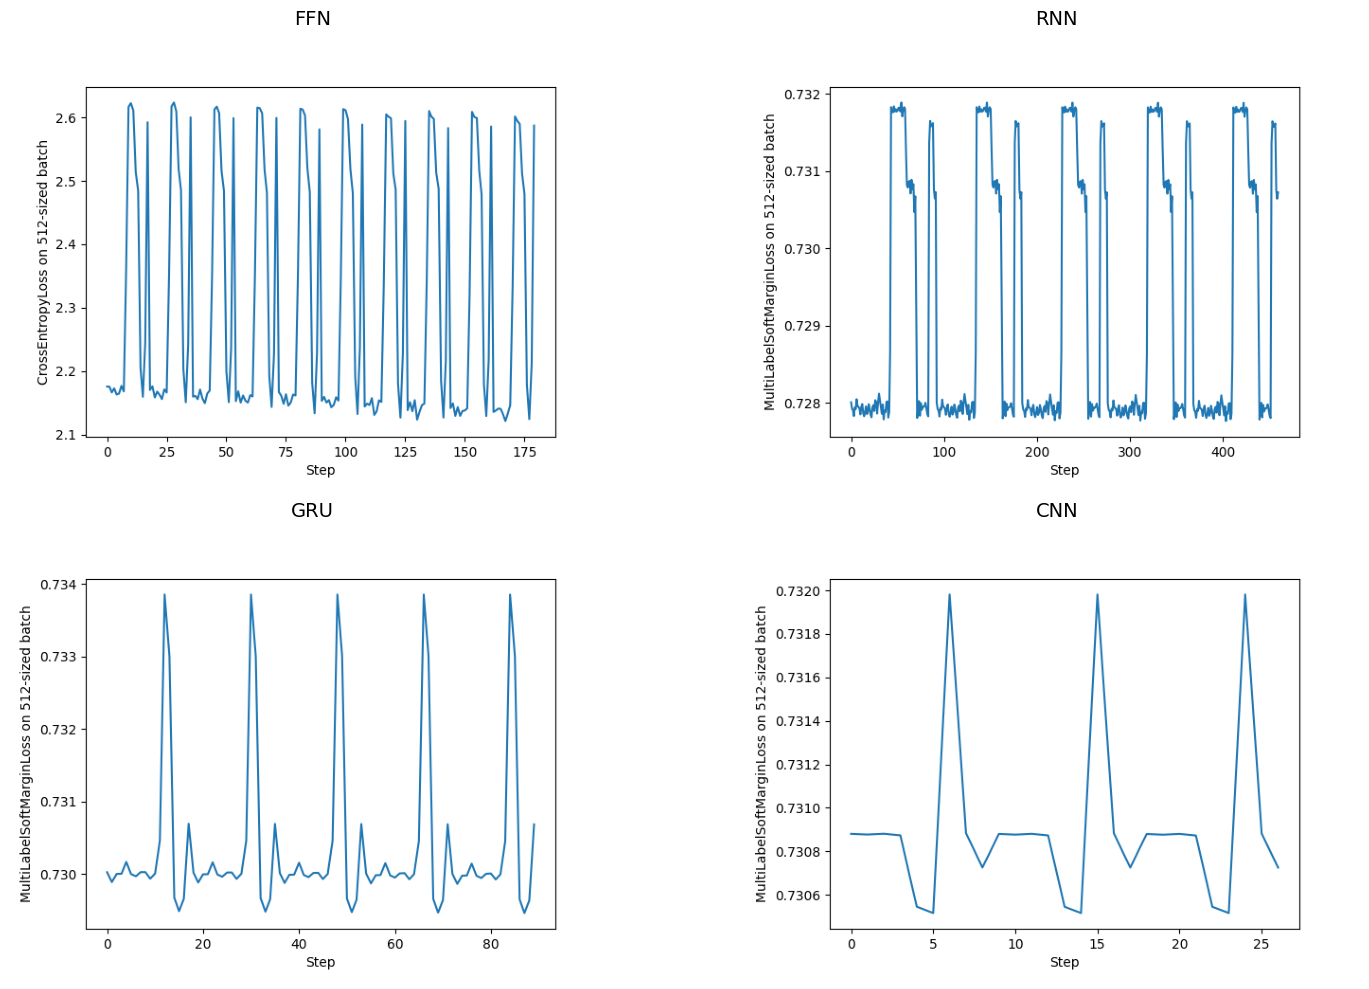

In [83]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

images = [
    (
        Image.open(os.path.join(paths[nn], "plot.png")),
        nn.upper()
	)
    for nn in ["ffn", "rnn", "gru", "cnn"]
]

for i, ax in enumerate(axs.ravel()):
    image, caption = images[i]
    ax.imshow(image)
    ax.set_title(caption, fontsize=14)
    ax.axis("off")

# adjust layout so titles do not overlap
plt.tight_layout()
# plt.subplots_adjust(hspace=-0.06)

plt.savefig("./benchmarking/nn_loss_plots.png", dpi=1200)
plt.show()

In [64]:
import json

ValueError: `bins` must increase monotonically, when an array

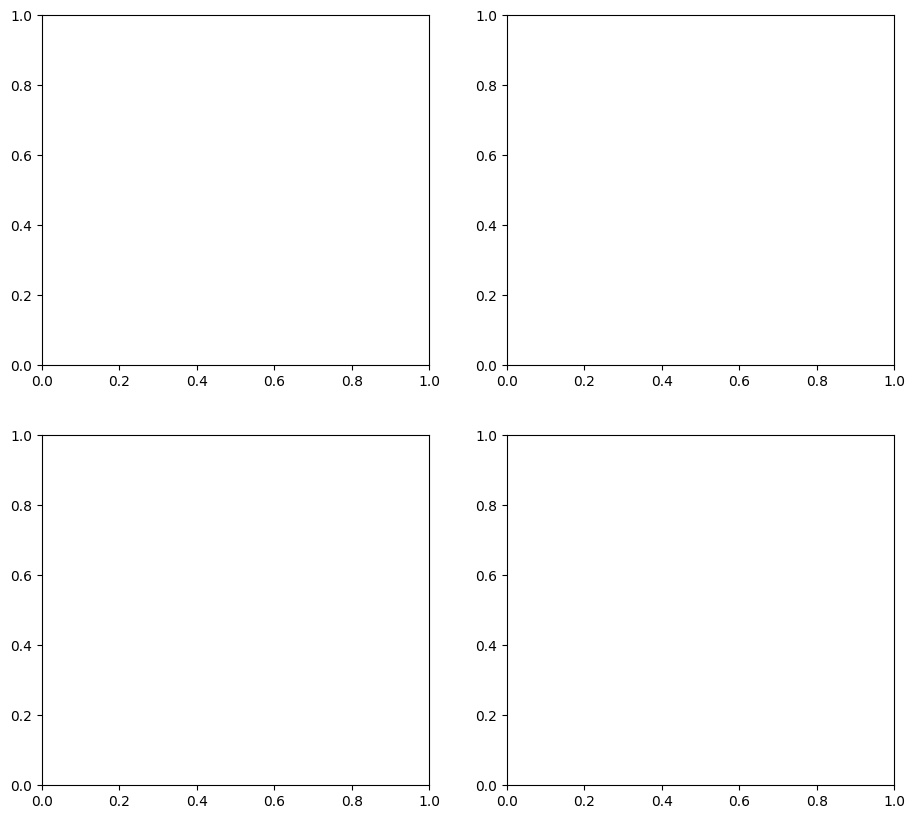

In [82]:
fig, axs = plt.subplots(2, 2, figsize=(11, 10))

for i, (ax, nn) in enumerate(zip(axs.ravel(), ["ffn", "rnn", "gru", "cnn"])):
	nn_dir = os.path.dirname(os.path.abspath((paths[nn])))
	with open(os.path.join(nn_dir, "train_sizes", "scores.json")) as f:
		train_sizes = json.load(f)
	train_sizes = sorted(train_sizes, key=lambda x: x["train_size"])
	sizes = [entry["train_size"] for entry in train_sizes]
	f1s = [entry["f1"] for entry in train_sizes]
	ax.hist(sizes, f1s)
	ax.set_xticks(sizes)
	caption = nn.upper()
	ax.set_title(caption, fontsize=14)

# adjust layout so titles do not overlap
plt.tight_layout()
# plt.subplots_adjust(hspace=-0.06)

# plt.savefig("./benchmarking/nn_loss_plots.png", dpi=1200)
plt.show()

In [72]:
with open(os.path.join(os.path.dirname(os.path.abspath(paths["ffn"])), "train_sizes", "scores.json")) as f:
	train_sizes = json.load(f)

[{'model': 'ffn',
  'parameters': {'context_window': 2,
   'record_none_links': False,
   'embeddings_params': {'name': 'torch', 'embedding_dim': 8},
   'nn_params': {'hidden_size': 16, 'activation': 'relu', 'dropout_rate': 0.1},
   'optimizer': 'SGD',
   'criterion': 'CrossEntropyLoss',
   'learning_rate': 0.0001,
   'n_epochs': 10},
  'train_size': 4736,
  'dev_size': 0,
  'test_size': 598,
  'precision': 0.04115751781081192,
  'recall': 0.07028349516550483,
  'f1': 0.01650525542381853,
  'accuracy': 0.08193979933110368},
 {'model': 'ffn',
  'parameters': {'context_window': 2,
   'record_none_links': False,
   'embeddings_params': {'name': 'torch', 'embedding_dim': 8},
   'nn_params': {'hidden_size': 16, 'activation': 'relu', 'dropout_rate': 0.1},
   'optimizer': 'SGD',
   'criterion': 'CrossEntropyLoss',
   'learning_rate': 0.0001,
   'n_epochs': 10},
  'train_size': 9460,
  'dev_size': 0,
  'test_size': 598,
  'precision': 0.06600677602381512,
  'recall': 0.0875492192838615,
  'f1'